### Python module/package imports for this chapter

In [14]:
import math, json, collections, itertools

In [15]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [16]:
from mpl_toolkits.basemap import Basemap
import geopy

### Code and data needed from previous videos

List of olympic cities and years:

In [17]:
cities = []
years = []

for game in open('games.txt','r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')

    cities.append(city)
    years.append(year)

Geolocated olympic-city coordinates (from a JSON file):

In [18]:
coordinates_by_city = json.load(open('coords.json','r'))
coordinates_by_city

{'Helsinki': [24.9425683, 60.1674086],
 'Berlin': [13.3888599, 52.5170365],
 'Athens': [-82.1012554, 39.3292396],
 'Barcelona': [2.1771353, 41.3825596],
 'Stockholm': [18.0710935, 59.3251172],
 'Rome': [12.6308541512038, 41.85233365],
 'St Louis': [-90.1978888, 38.6272733],
 'Rio': [-43.2093726, -22.9110136],
 'Beijing': [116.391248, 39.9059631],
 'Montreal': [-73.6125179, 45.497684],
 'Tokyo': [139.294774527387, 34.2255804],
 'Melbourne / Stockholm': [144.9631608, -37.8142175],
 'Seoul': [126.9782914, 37.5666791],
 'London': [-0.1276473, 51.5073219],
 'Sydney': [151.210047, -33.8679573],
 'Mexico': [-99.1333415, 19.4326009],
 'Antwerp': [4.3997081, 51.2211097],
 'Moscow': [37.6174976, 55.7506828],
 'Los Angeles': [-118.2439408, 34.0543942],
 'Munich': [11.5753822, 48.1371079],
 'Atlanta': [-84.3901848, 33.7490987],
 'Amsterdam': [4.89797550561798, 52.3745403],
 'Paris': [2.3514992, 48.8566101]}

## Comprehensions and generators

In [22]:
results = []

for city, year in zip(cities, years):
    if int(year) > 1945:
        results.append(city + ': ' + year )

In [24]:
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [25]:
# f(element) for element in iterator if condition(element)

results = [city + ": " + year for city, year in zip(cities, years) if int(year)>1945]

In [26]:
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [28]:
cities_by_year = {year: city for city, year in zip(cities, years)}

In [29]:
cities_by_year

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [30]:
cities_after_1930 = {city for year,city in cities_by_year.items() if int(year) > 1930}

In [31]:
cities_after_1930

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne / Stockholm',
 'Mexico',
 'Montreal',
 'Moscow',
 'Munich',
 'Rio',
 'Rome',
 'Seoul',
 'Sydney',
 'Tokyo'}

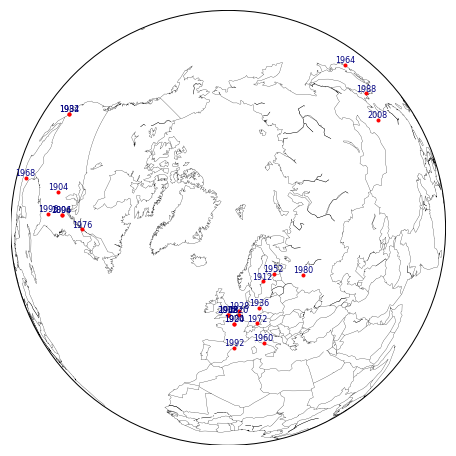

In [35]:
pp.figure(figsize=(8,8))

world = Basemap(projection = 'ortho', lat_0=75, lon_0=0)

world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for year,city in cities_by_year.items():
    x,y = world(*coordinates_by_city[city])
    
    world.plot(x,y,'r.')
    pp.text(x,y,year, fontsize=8,ha='center',va='bottom', color='navy')

In [40]:
even = (i for i in range(20) if i % 2 == 0)

In [41]:
even

<generator object <genexpr> at 0x000002332D6997C8>

In [42]:
even.__next__()

0

In [43]:
even.__next__()

2

In [44]:
even = (i for i in range(20) if i % 2 == 0)

In [45]:
sum(even)

90

In [50]:
def fibonacci():
    f1,f2 = 0,1
    
    while True:
        yield f2
        f1, f2 = f2, f1+f2

In [51]:
f = fibonacci()

In [52]:
[next(f) for i in range (20)] #next(f) shorthand for f.__next__

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]